In [173]:
import pandas as pd
df = pd.read_csv('Earthquakes_database.csv') 

pd.set_option('display.max_columns', 33)
pd.set_option('display.max_rows', 22) 

In [174]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,8:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,9:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [175]:
#1. L6
# changing 'Status' column values from 'Automatic' to 'Auto' and from 'Reviewed' to 'Reved'.
# df['Status'].value_counts()
df["Status"] = df["Status"].str.replace('Automatic','Auto')
df["Status"] = df["Status"].str.replace('Reviewed','Reved')
# df

In [176]:
#1. L6
# changing None values using replace method.
df = df.replace('NaN','---')
# df

In [177]:
#1. L6
# removing 'Azimuthal Gap' column
df.drop(columns=['Azimuthal Gap'], inplace=True)
#df

In [178]:
#1. L6
# create a new column 'Magnitude_Type' based on the 'Magnitude' column.
df['Earthquake Type'] = df['Magnitude'].apply(lambda x: 'Big' if x >= 6 else 'Small')
# df

In [179]:
#2. L7
# creating bins and labels for depth types
bins = [df['Depth'].min() - 1, 50, 100, df['Depth'].max() + 1]
labels = ['high', 'average', 'deep']

# inserting a new column 'Depth Type' after the 'Depth' column 
df.insert(df.columns.get_loc('Depth') + 1, 'Depth Type', pd.cut(df['Depth'], bins=bins, labels=labels))

In [180]:
#3. L9
# using the melt function to reshape
# id_vars columns will stay unchanged
df.melt(id_vars=['Date', 'Time', 'ID'])

,Date,Time,ID,variable,value
0,1/2/1965,13:44:18,ISCGEM860706,Latitude,19.246
1,1/4/1965,11:29:49,ISCGEM860737,Latitude,1.863
2,1/5/1965,18:05:58,ISCGEM860762,Latitude,-20.579
3,1/8/1965,18:49:43,ISCGEM860856,Latitude,-59.076
4,1/9/1965,13:32:50,ISCGEM860890,Latitude,11.938
...,...,...,...,...,...
444823,12/28/2016,8:22:12,NN00570710,Earthquake Type,Small
444824,12/28/2016,9:13:47,NN00570744,Earthquake Type,Small
444825,12/28/2016,12:38:51,US10007NAF,Earthquake Type,Small
444826,12/29/2016,22:30:19,US10007NL0,Earthquake Type,Big


In [181]:
#3. L9
# using the stack method on df
df.stack(level=0)

0      Date                  1/2/1965
       Time                  13:44:18
       Latitude                19.246
       Longitude              145.616
       Type                Earthquake
                              ...    
23411  Source                      US
       Location Source             US
       Magnitude Source            US
       Status                   Reved
       Earthquake Type          Small
Length: 385738, dtype: object

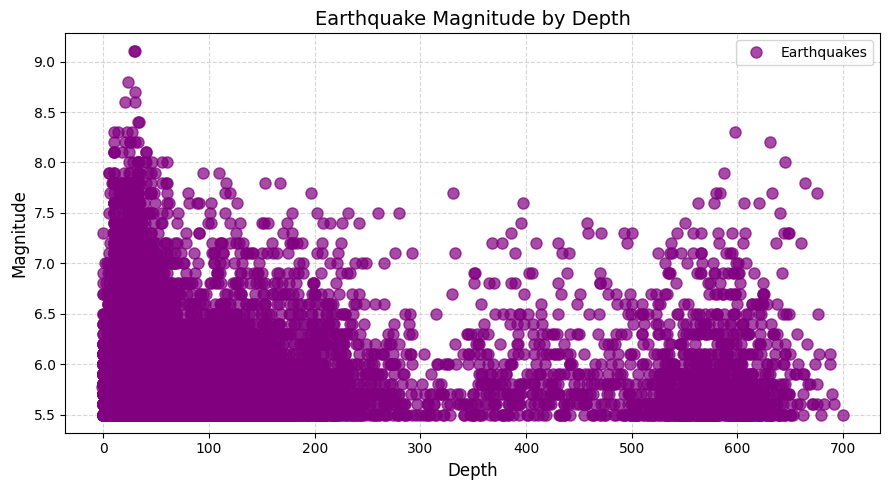

In [182]:
#4. L10 #LINEAR
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

plt.plot(df['Depth'], df['Magnitude'], marker='o', color='purple', linestyle='', markersize=8, alpha=0.7)

# labels and title
plt.xlabel('Depth', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.title('Earthquake Magnitude by Depth', fontsize=14)

# grid
plt.grid(True, linestyle='--', alpha=0.5)

#  legend
plt.legend(['Earthquakes'], loc='upper right')

plt.tight_layout()
plt.show()

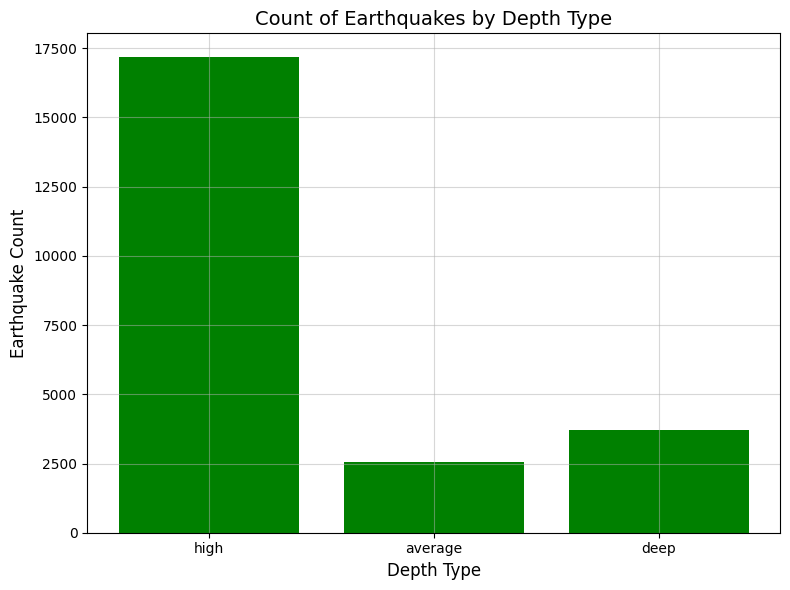

In [183]:
#4. L10 #BAR
import matplotlib.pyplot as plt

depth_type_counts = df['Depth Type'].value_counts()

depth_type_counts = depth_type_counts.reindex(labels)

plt.figure(figsize=(8, 6))
plt.bar(depth_type_counts.index, depth_type_counts.values, color='green')

#labels and title
plt.xlabel('Depth Type', fontsize=12)
plt.ylabel('Earthquake Count', fontsize=12)
plt.title('Count of Earthquakes by Depth Type', fontsize=14)

# grid
plt.grid(True, linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

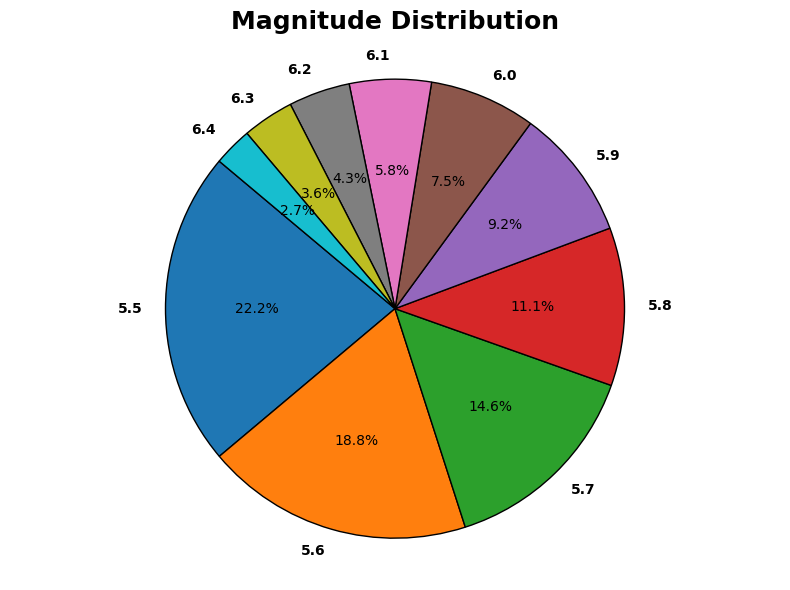

In [184]:
#4. L10 #PIE
sizes = df['Magnitude'].value_counts().head(10)

# labels and sizes
labels = sizes.index
sizes = sizes.values

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('equal')
plt.title('Magnitude Distribution', size=18, weight='bold')

wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1})

# Customize the appearance of the labels
for text, autotext in zip(texts, autotexts):
    text.set(size=10, weight='bold')
    autotext.set(size=10)

plt.tight_layout()
plt.show()

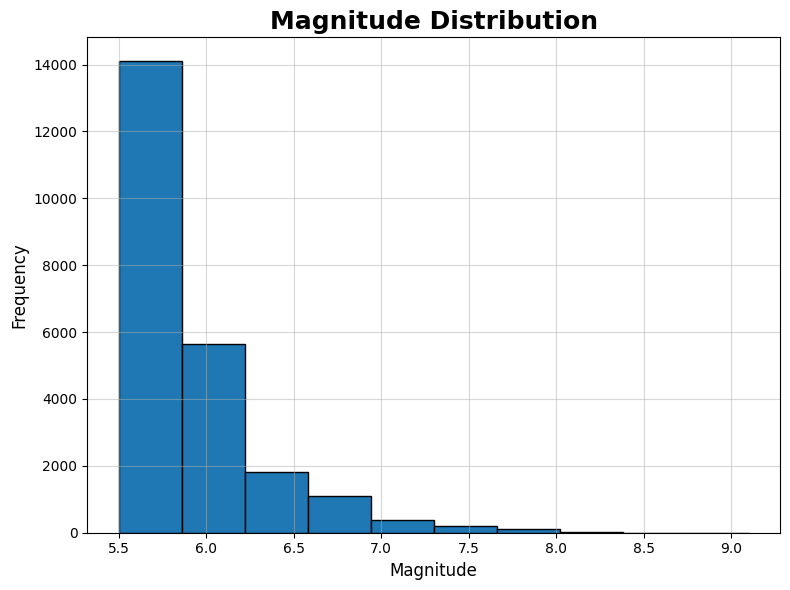

In [185]:
#4. L10 #HISTOGRAM
sizes = df['Magnitude']

plt.figure(figsize=(8, 6))
plt.hist(sizes, bins=10, edgecolor='black')

# title and labels
plt.title('Magnitude Distribution', size=18, weight='bold')
plt.xlabel('Magnitude', size=12)
plt.ylabel('Frequency', size=12)

# grid
plt.grid(True, linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()